In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import time
from tqdm import tqdm
import seaborn as sns
from IPython import display
import geopandas as gpd

In [14]:
ts1g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\1to5ts_gas.csv', index_col=[0])
ts2g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\7to17ts_gas.csv', index_col=[0])
ts3g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\19to33ts_gas.csv', index_col=[0])
ts4g = pd.read_csv(r'C:\Users\jesse.pisel\Downloads\TTL_Prod041018\timeseries\35to45ts_gas.csv', index_col=[0])
bigTSgas = pd.concat([ts1g, ts2g, ts3g, ts4g], axis=1)
bigTSoil = bigTSgas

In [4]:
bigTSoil = pd.concat([ts1, ts2, ts3, ts4], axis=1)

NameError: name 'ts1' is not defined

In [ ]:
bigTSoil = bigTSoil.loc[:, (bigTSoil != 0).any(axis=0)]
bigTSoil = bigTSoil.drop(columns=['3725354', '3725355'], axis=1)

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def decline_curve(curve_type, q_i):
    if curve_type == "exponential":
        def exponential_decline(T, a):
            return q_i*np.exp(-a*T)
        return exponential_decline
    
    elif curve_type == "hyperbolic":
        def hyperbolic_decline(T, a_i, b):
            return q_i/np.power((1+b*a_i*T), 1./b)
        return hyperbolic_decline
    
    elif curve_type == "harmonic":
        def parabolic_decline(T, a_i):
            return q_i/(1+a_i*T)
        return parabolic_decline
    
    else:
        raise "I don't know this decline curve!"

def L2_norm(Q, Q_obs):
    return np.sum(np.power(np.subtract(Q, Q_obs), 2))

In [417]:
exp_decline = decline_curve("exponential", Q[np.where(Q>0)[0][0]])
hyp_decline = decline_curve("hyperbolic", Q[np.where(Q>0)[0][0]])
har_decline = decline_curve("harmonic", Q[np.where(Q>0)[0][0]])

popt_exp, pcov_exp = curve_fit(exp_decline, T, Q, method="trf")
popt_hyp, pcov_hyp = curve_fit(hyp_decline, T, Q, method="trf")
popt_har, pcov_har = curve_fit(har_decline, T, Q, method="trf")

print("L2 Norm of exponential decline: ", L2_norm(exp_decline(T, popt_exp[0]), Q))
print("L2 Norm of hyperbolic decline decline: ", L2_norm(hyp_decline(T, popt_hyp[0], popt_hyp[1]), Q))
print("L2 Norm of harmonic decline decline: ", L2_norm(har_decline(T, popt_har[0]), Q))

L2 Norm of exponential decline:  23121.258423671166
L2 Norm of hyperbolic decline decline:  18985.35489003022
L2 Norm of harmonic decline decline:  19144.286161750948


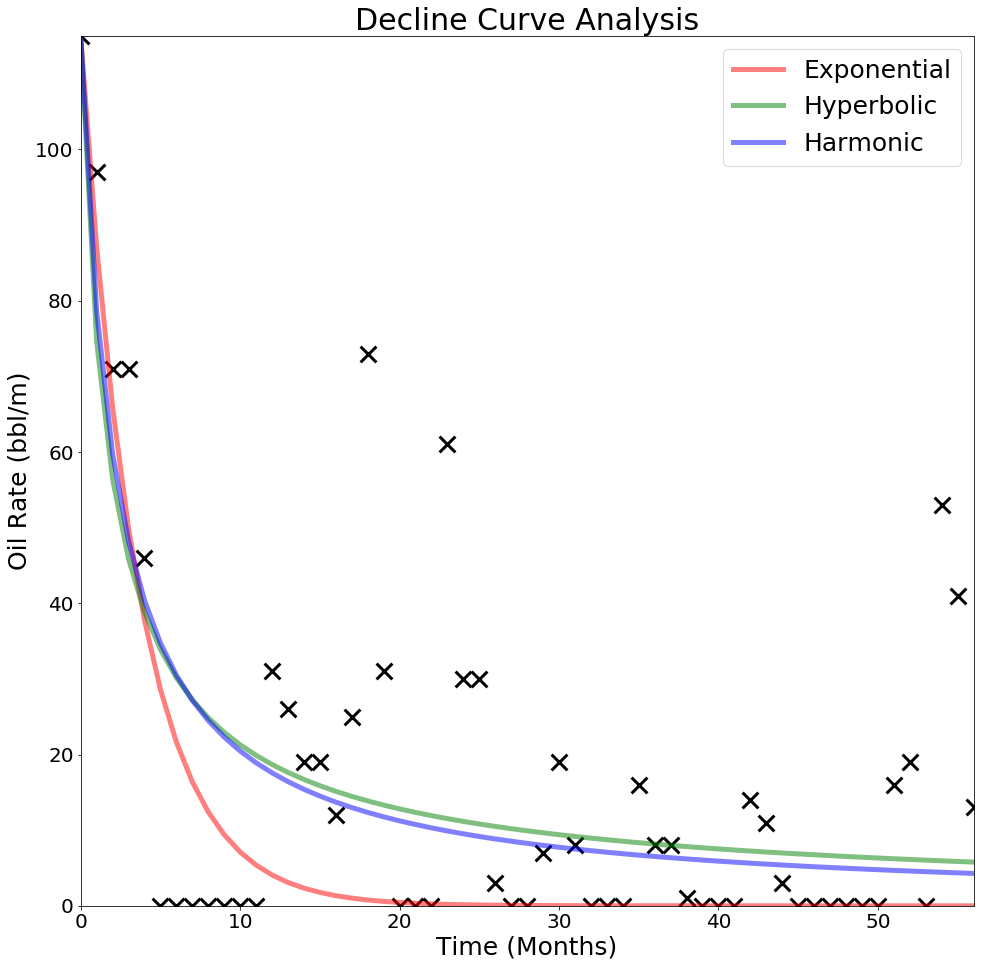

In [418]:
fig, ax = plt.subplots(1, figsize=(16, 16))

ax.set_title("Decline Curve Analysis", fontsize=30)

label_size = 20
yed = [tick.label.set_fontsize(label_size) for tick in ax.yaxis.get_major_ticks()]
xed = [tick.label.set_fontsize(label_size) for tick in ax.xaxis.get_major_ticks()]

ax.set_xlim(min(T), max(T))

ax.scatter(T, Q, color="black", marker="x", s=250, linewidth=3)
ax.set_xlabel("Time (Months)", fontsize=25)
ax.set_ylabel("Oil Rate (bbl/m)", fontsize=25)

pred_exp = exp_decline(T, popt_exp[0])
pred_hyp = hyp_decline(T, popt_hyp[0], popt_hyp[1])
pred_har = har_decline(T, popt_har[0])

min_val = min([min(curve) for curve in [pred_exp, pred_hyp, pred_har]])
max_val = max([max(curve) for curve in [pred_exp, pred_hyp, pred_har]])

ax.set_ylim(min_val, max_val)

ax.plot(T, pred_exp, color="red", linewidth=5, alpha=0.5, label="Exponential")
ax.plot(T, pred_hyp, color="green", linewidth=5, alpha=0.5, label="Hyperbolic")
ax.plot(T, pred_har, color="blue", linewidth=5, alpha=0.5, label="Harmonic")
ax.ticklabel_format(fontsize=25)
ax.legend(fontsize=25)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


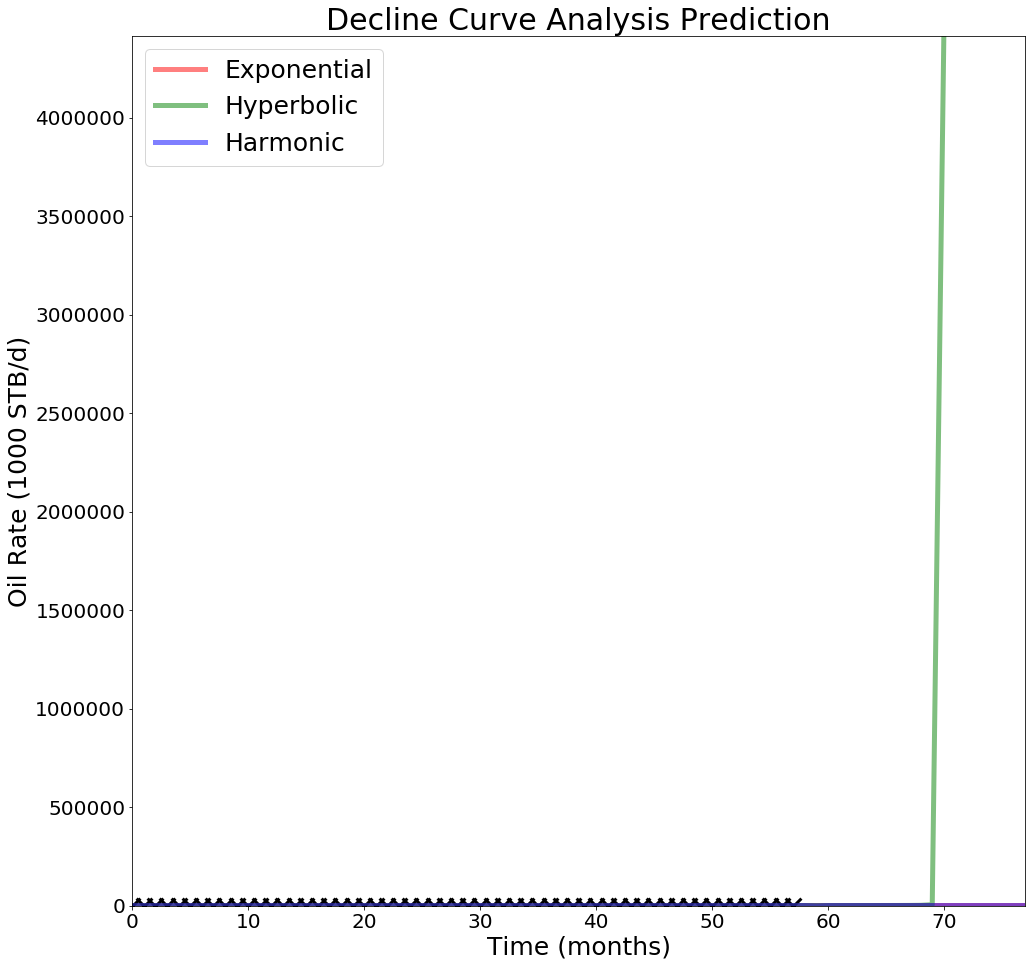

In [412]:
fig, ax = plt.subplots(1, figsize=(16, 16))

T_max = len(T)+20.0 #through January 2020
T_pred = np.arange(min(T), T_max)

ax.set_title("Decline Curve Analysis Prediction", fontsize=30)

label_size = 20
yed = [tick.label.set_fontsize(label_size) for tick in ax.yaxis.get_major_ticks()]
xed = [tick.label.set_fontsize(label_size) for tick in ax.xaxis.get_major_ticks()]

ax.set_xlim(min(T), max(T_pred))

ax.scatter(T, Q, color="black", marker="x", s=250, linewidth=3)
ax.set_xlabel("Time (months)", fontsize=25)
ax.set_ylabel("Oil Rate (1000 STB/d)", fontsize=25)

pred_exp = exp_decline(T_pred, popt_exp[0])
pred_hyp = hyp_decline(T_pred, popt_hyp[0], popt_hyp[1])
pred_har = har_decline(T_pred, popt_har[0])

min_val = min([min(curve) for curve in [pred_exp, pred_hyp, pred_har]])
max_val = max([max(curve) for curve in [pred_exp, pred_hyp, pred_har]])

ax.set_ylim(min_val, max_val)

ax.plot(T_pred, pred_exp, color="red", linewidth=5, alpha=0.5, label="Exponential")
ax.plot(T_pred, pred_hyp, color="green", linewidth=5, alpha=0.5, label="Hyperbolic")
ax.plot(T_pred, pred_har, color="blue", linewidth=5, alpha=0.5, label="Harmonic")
ax.ticklabel_format(fontsize=25)
ax.legend(fontsize=25)

In [7]:
bigTSoil.replace(np.inf, np.nan, inplace=True)
bigTSoil.replace(to_replace=0.0, value=0.0001, inplace=True)
bigTSoil = bigTSoil.fillna(0.001)

In [16]:
df = pd.DataFrame(index=pd.date_range('1978-01-31', '2019-12-31', freq='M'))
for i in tqdm(range(40000)):
    try:
        Q0=bigTSoil.iloc[0:,i].dropna().values
        Q=Q0[np.where(Q0>50)[0][0]:]
        T=range(0,len(Q))
        
        exp_decline = decline_curve("exponential", Q[np.where(Q>50)[0][0]])
        hyp_decline = decline_curve("hyperbolic", Q[np.where(Q>50)[0][0]])
        har_decline = decline_curve("harmonic", Q[np.where(Q>50)[0][0]])

        popt_hyp, pcov_hyp = curve_fit(har_decline, T, Q, method="trf")
        popt_har, pcov_har = curve_fit(har_decline, T, Q, method="trf")
        popt_exp, pcov_exp = curve_fit(exp_decline, T, Q, method="trf")


        T_max = len(T)+20.0 #through January 2020
        T_pred = np.arange(min(T), T_max)
        #pred_hyp = hyp_decline(T_pred, popt_hyp[0], popt_hyp[1])
        pred_har = har_decline(T_pred, popt_har[0])
        pred_exp = exp_decline(T_pred, popt_exp[0])


        filled = np.pad(pred_exp, (504-(504-np.where(Q0>50)[0][0]),0),'constant')
        df[bigTSoil.columns[i]] = filled
    except:
        pass


  9%|██████▊                                                                      | 3550/40000 [01:19<13:39, 44.50it/s]C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
100%|████████████████████████████████████████████████████████████████████████████| 40000/40000 [15:53<00:00, 41.94it/s]


In [14]:
df[df<0] = 0
df[df>100000] = 0

In [89]:
df.iloc[:, df.max().sort_values(ascending=False).index]

TypeError: '>=' not supported between instances of 'str' and 'int'

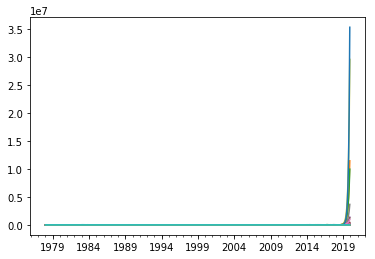

In [17]:
df.iloc[:,0:20000].plot(legend=False)

In [15]:
bigTSoil = bigTSoil.loc[:, bigTSoil.mean().sort_values(ascending=False).index]

In [16]:
bigTSoil.index = pd.to_datetime(bigTSoil.index)

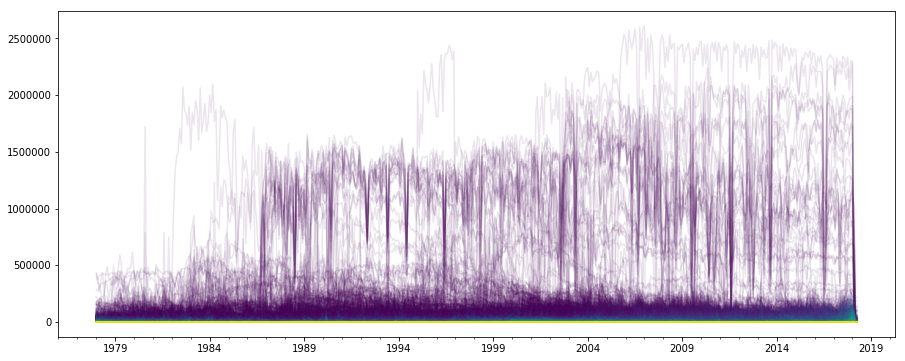

In [21]:
bigTSoil.iloc[0:, 0:76953].plot(legend=False, cmap='viridis', alpha=0.1, figsize=(15,6))

In [20]:
bigTSoil.shape

(484, 76953)

In [19]:
bigTSoil.max().sort_values(ascending=False)

3520818    2614424.0
3721090    2439385.0
3520849    2292593.0
3520813    2176623.0
3520871    2117141.0
3520846    2109840.0
3520867    2103955.0
4120130    2099046.0
3520890    2087777.0
1322051    1873015.0
1322226    1858104.0
3520873    1853385.0
3520870    1852213.0
4522736    1764283.0
1321362    1762288.0
1321510    1741938.0
1320818    1724017.0
4120322    1640358.0
4121001    1632774.0
3520816    1630132.0
3520750    1621184.0
1321917    1608603.0
1322127    1593810.0
3520866    1550700.0
3520894    1532068.0
3520862    1524221.0
4120268    1506826.0
3520815    1467948.0
1321756    1461417.0
4121019    1458286.0
             ...    
2906299          0.0
2906257          0.0
2906248          0.0
2906224          0.0
2906439          0.0
2906447          0.0
2906452          0.0
2906400          0.0
2906453          0.0
2906466          0.0
2906469          0.0
2906479          0.0
2906481          0.0
2906495          0.0
2906510          0.0
2906511          0.0
2906516      